In [1]:
import os
from pfca import init_path
from pfca.visuals.img2D import imgplot

Current Working Directory: /Users/shwetankpanwar/Documents/BTPData/python_scripts/cmb_segmentation
The file structure creation failed. Structure already exists!


In [29]:
from pfca.visuals.plot3D import *

In [2]:
from pfca.core.preprocessing import *

In [3]:
from pfca.core.processing import *

In [4]:
from pfca import file_read as f
import ants

In [5]:
raw_dir, nifti_dir = init_path()
cur_path = os.getcwd()
patients_list = f.get_immediate_subdirectories(raw_dir)
patient = patients_list[0]

In [6]:
im_nifti = nifti_ANTS(nifti_dir, patient, category = 'eswan', unskulled = True)
im_patient = mni_template_registration(cur_path, im_nifti, patient)

In [7]:
#testing for template exclusion idea for anatomical exclusion to reduce search space
talariach = ants.image_read(cur_path + '/datasets/talairach.nii')
mni_t2 = ants.image_read(cur_path + '/datasets/mni_t2_template.nii')
harvard_atlas = ants.image_read(cur_path + '/datasets/harvard_atlas.nii')

In [8]:
talariach

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (141, 172, 110)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (70.0, 102.0, -42.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [9]:
im_patient

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (197, 233, 189)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, 134.0, -72.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [10]:
mni_t2

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (197, 233, 189)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, 134.0, -72.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [11]:
harvard_atlas

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

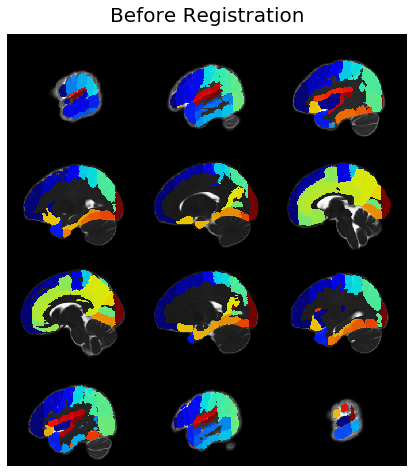

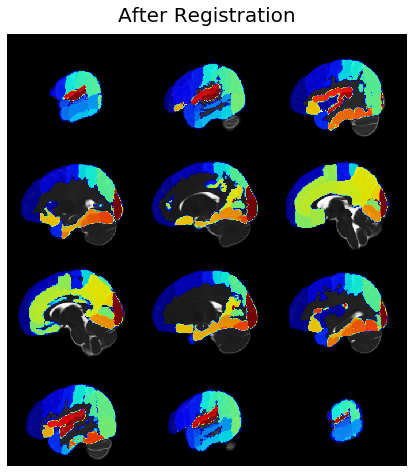

In [13]:
#Registering Harvard-Oxford Atlas with MNI-152 template using non-linear registration
harvard_mni = mni_template_registration(cur_path,harvard_atlas,'harvard')

In [14]:
harvard_mni

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (197, 233, 189)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, 134.0, -72.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

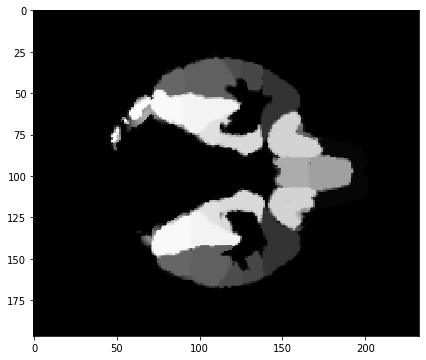

In [17]:
imgplot(harvard_mni, slice_no=[45])

In [22]:
#generating cortex mask from the atlas excluding all the regions of cerebrum 
harvard_mni_mask = ((harvard_mni.numpy()) > 0)*1

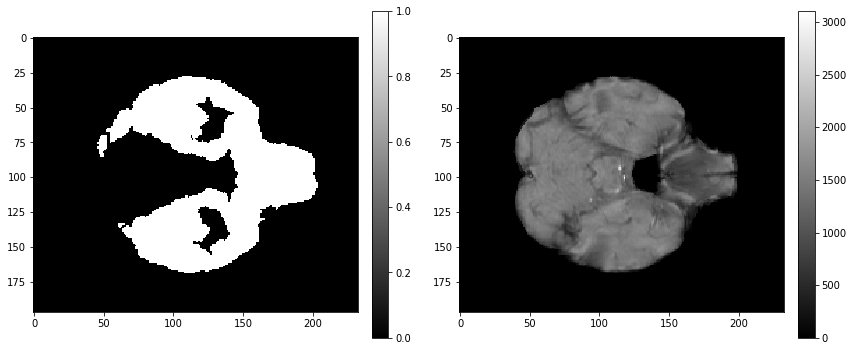

In [24]:
imgplot(harvard_mni_mask, im_patient, slice_no=[45,45])

In [27]:
cortex_regions = harvard_mni_mask * im_patient.numpy()

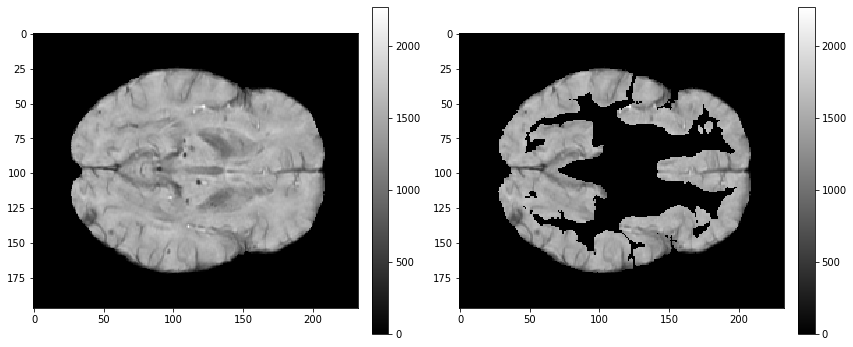

In [28]:
imgplot(im_patient, cortex_regions, slice_no=[65,65])

In [31]:
#Plot the cortex regions of the brain using the plot_brain function
plot_brain(cortex_regions)